## Run the below cell compulsorily

In [387]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
market_cust_data=pd.read_csv("files_for_lab/csv_files/marketing_customer_analysis.csv")

In [388]:
# 1. Show the dataframe shape.
market_cust_data.shape
# Drop the Unnamed column
market_cust_data.drop(['Unnamed: 0'], axis=1,inplace=True)

In [389]:
# 2. Standardize header names.
market_cust_data.columns = [col.lower().replace(' ','_') for col in market_cust_data.columns]

In [390]:
# 3. Which columns are numerical?
list(market_cust_data.describe(include=[int,float]).T.index)

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

In [391]:
# 4. Which columns are categorical?
list(market_cust_data.describe(include=[object]).T.index)

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type']

In [392]:
# 5. Check and deal with NaN values.
market_cust_data.isna().sum()

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

## Run below cell before running Transformation Function

In [393]:
def convert_nan_to_mode(df,colname):
    if df[colname].isna().value_counts(normalize=True)[True]<0.1:
        df[colname] = df[colname].fillna(df[colname].value_counts().index[0])
    return df

In [394]:
def freq_cnt_perc(df,colname):
    return (round(df[colname].value_counts(normalize=True,dropna=False)*100,2)).astype(str) + '%'

In [395]:
freq_cnt_perc(market_cust_data,'state')

California    32.56%
Oregon        26.66%
Arizona       17.75%
Nevada          9.1%
Washington     8.14%
NaN            5.78%
Name: state, dtype: object

In [396]:
# As NaN account for less than 10%, we can safely replace the NaNs with Mode (most frequent value)
market_cust_data=convert_nan_to_mode(market_cust_data,'state')
freq_cnt_perc(market_cust_data,'state')

California    38.34%
Oregon        26.66%
Arizona       17.75%
Nevada          9.1%
Washington     8.14%
Name: state, dtype: object

In [397]:
freq_cnt_perc(market_cust_data,'response')

No     80.78%
Yes    13.44%
NaN     5.78%
Name: response, dtype: object

In [398]:
# # As NaN account for less than 10%, we can safely replace the NaNs with Mode (most frequent value)
market_cust_data=convert_nan_to_mode(market_cust_data,'response')
freq_cnt_perc(market_cust_data,'response')

No     86.56%
Yes    13.44%
Name: response, dtype: object

In [399]:
freq_cnt_perc(market_cust_data,'months_since_last_claim')

NaN      5.8%
3.0      3.9%
6.0     3.61%
1.0     3.54%
7.0     3.46%
4.0     3.42%
2.0     3.37%
5.0     3.25%
0.0     3.24%
10.0    3.17%
16.0    3.05%
11.0    3.03%
15.0    2.96%
13.0    2.93%
8.0     2.89%
12.0    2.81%
17.0    2.74%
14.0    2.74%
9.0     2.54%
19.0    2.53%
23.0    2.53%
25.0    2.47%
21.0    2.45%
18.0    2.36%
20.0    2.33%
22.0    2.25%
24.0    2.17%
29.0    2.14%
28.0    2.08%
31.0    2.03%
26.0    1.93%
27.0    1.91%
30.0    1.84%
34.0    1.82%
33.0    1.81%
35.0    1.44%
32.0    1.42%
Name: months_since_last_claim, dtype: object

In [400]:
# Even though the NaNs account for less than 10% of the total values of this column, the column values are categorical and
# are evenly distributed in all the categories. Moving NaNs to any of the categories will 'skew' the distribution. The best
# way would be to delete the rows having NaNs in this column.

market_cust_data = market_cust_data[market_cust_data['months_since_last_claim'].notna()]
freq_cnt_perc(market_cust_data,'months_since_last_claim')

3.0     4.15%
6.0     3.83%
1.0     3.76%
7.0     3.68%
4.0     3.63%
2.0     3.58%
5.0     3.45%
0.0     3.44%
10.0    3.37%
16.0    3.24%
11.0    3.22%
15.0    3.14%
13.0    3.11%
8.0     3.07%
12.0    2.99%
17.0    2.91%
14.0    2.91%
9.0      2.7%
23.0    2.69%
19.0    2.69%
25.0    2.62%
21.0     2.6%
18.0     2.5%
20.0    2.47%
22.0    2.39%
24.0    2.31%
29.0    2.28%
28.0    2.21%
31.0    2.15%
26.0    2.05%
27.0    2.02%
30.0    1.96%
34.0    1.94%
33.0    1.93%
35.0    1.53%
32.0    1.51%
Name: months_since_last_claim, dtype: object

In [401]:
# The NaNs in column 'number_of_open_complaints' get automatically cleared after removing rows in column 
# 'months_since_last_claim' containing NaNs

freq_cnt_perc(market_cust_data,'number_of_open_complaints')

0.0     79.4%
1.0    11.14%
2.0     4.03%
3.0     3.15%
4.0     1.62%
5.0     0.66%
Name: number_of_open_complaints, dtype: object

In [402]:
freq_cnt_perc(market_cust_data,'vehicle_class')

Four-Door Car    47.68%
Two-Door Car     19.59%
SUV              18.51%
NaN               5.64%
Sports Car        4.96%
Luxury SUV        1.91%
Luxury Car        1.71%
Name: vehicle_class, dtype: object

In [403]:
# # As NaN account for less than 10%, we can safely replace the NaNs with Mode (most frequent value)
market_cust_data=convert_nan_to_mode(market_cust_data,'vehicle_class')
freq_cnt_perc(market_cust_data,'vehicle_class')

Four-Door Car    53.32%
Two-Door Car     19.59%
SUV              18.51%
Sports Car        4.96%
Luxury SUV        1.91%
Luxury Car        1.71%
Name: vehicle_class, dtype: object

In [404]:
freq_cnt_perc(market_cust_data,'vehicle_size')

Medsize    66.53%
Small      18.12%
Large       9.71%
NaN         5.64%
Name: vehicle_size, dtype: object

In [405]:
# # As NaN account for less than 10%, we can safely replace the NaNs with Mode (most frequent value)
market_cust_data=convert_nan_to_mode(market_cust_data,'vehicle_size')
freq_cnt_perc(market_cust_data,'vehicle_size')

Medsize    72.17%
Small      18.12%
Large       9.71%
Name: vehicle_size, dtype: object

In [406]:
freq_cnt_perc(market_cust_data,'vehicle_type')

NaN    50.28%
A      49.72%
Name: vehicle_type, dtype: object

In [407]:
# As NaNs account for more than 50% of the values in this column, we cannot simply remove the rows. We have to assign a default
# value to the NaNs which is not equal to the most frequent non null value 'A' otherwise the distribution will again get 'skewed'.
market_cust_data['vehicle_type'] = market_cust_data['vehicle_type'].fillna('U')

In [408]:
# Check for NaN values once again.
market_cust_data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

In [409]:
# 6. Extract the months from the dataset and store in a separate column. 
market_cust_data['effective_to_date']=pd.to_datetime(market_cust_data['effective_to_date'],errors='coerce')
market_cust_data['effective_to_month']=market_cust_data['effective_to_date'].apply(lambda x : x.month)
market_cust_data[market_cust_data['effective_to_month'].isin([1,2,3])]

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,effective_to_month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,U,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,U,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
5,HO81102,California,4745.181764,No,Basic,High School or Below,2011-02-14,Employed,M,50549,Suburban,Divorced,61,2.0,73,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,Suburban,Single,187,14.0,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,U,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


## Transformation Function

In [410]:
# 7. BONUS: Transformation Function

# NOTE: Run cell 1 and def convert_nan_to_mode(df,colname) function before running this transformation function.

def transform_df(df):
    # Drop the Unnamed column
    df.drop(['Unnamed: 0'], axis=1,inplace=True)
    # 2. Standardize header names.
    df.columns = [col.lower().replace(' ','_') for col in df.columns] 
    # 3. Which columns are numerical?
    list(df.describe(include=[int,float]).T.index)
    # 4. Which columns are categorical?
    list(df.describe(include=[object]).T.index)
    # 5. Check and deal with NaN values.
    df.isna().sum()
    # As NaN account for less than 10%, we can safely replace the NaNs with Mode (most frequent value)
    df=convert_nan_to_mode(df,'state')
    # As NaN account for less than 10%, we can safely replace the NaNs with Mode (most frequent value)
    df=convert_nan_to_mode(df,'response')
    # Even though the NaNs account for less than 10% of the total values of this column, the column values are categorical and
    # are evenly distributed in all the categories. Moving NaNs to any of the categories will 'skew' the distribution. The best
    # way would be to delete the rows having NaNs in this column.
    df = df[df['months_since_last_claim'].notna()]
    # As NaN account for less than 10%, we can safely replace the NaNs with Mode (most frequent value)
    df=convert_nan_to_mode(df,'vehicle_class')
    # As NaN account for less than 10%, we can safely replace the NaNs with Mode (most frequent value)
    df=convert_nan_to_mode(df,'vehicle_size')
    # As NaNs account for more than 50% of the values in this column, we cannot simply remove the rows. We have to assign a default
    # value to the NaNs which is not equal to the most frequent non null value 'A' otherwise the distribution will again get 'skewed'.
    df['vehicle_type'] = df['vehicle_type'].fillna('U')
    # 6. Extract the months from the dataset and store in a separate column. 
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'],errors='coerce')
    df['effective_to_month']=df['effective_to_date'].apply(lambda x : x.month)
    df[df['effective_to_month'].isin([1,2,3])]
    return df

In [411]:
market_cust_data=pd.read_csv("files_for_lab/csv_files/marketing_customer_analysis.csv")
market_cust_data=transform_df(market_cust_data)

In [412]:
market_cust_data.to_csv("market_cust_data.csv",index=False)

# lab-customer-analysis-round-3

In [413]:
# 1. Show DataFrame info.
market_cust_data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,effective_to_month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,U,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,U,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
5,HO81102,California,4745.181764,No,Basic,High School or Below,2011-02-14,Employed,M,50549,Suburban,Divorced,61,2.0,73,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,Suburban,Single,187,14.0,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,U,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [414]:
# 2. Describe DataFrame.
market_cust_data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,10277.0,8030.503327,6930.733408,1898.007675,4002.857594,5764.862315,8986.610653,83325.381190
income,10277.0,37648.597743,30377.415086,0.000000,0.000000,33938.000000,62326.000000,99981.000000
monthly_premium_auto,10277.0,93.192274,34.512179,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,10277.0,15.149071,10.080349,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,10277.0,48.087769,27.936582,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,10277.0,0.384256,0.912457,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,10277.0,2.965846,2.390763,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,10277.0,433.874870,291.681330,0.099007,271.074379,380.917107,547.200000,2893.239678
effective_to_month,10277.0,1.465311,0.498819,1.000000,1.000000,1.000000,2.000000,2.000000


<AxesSubplot:>

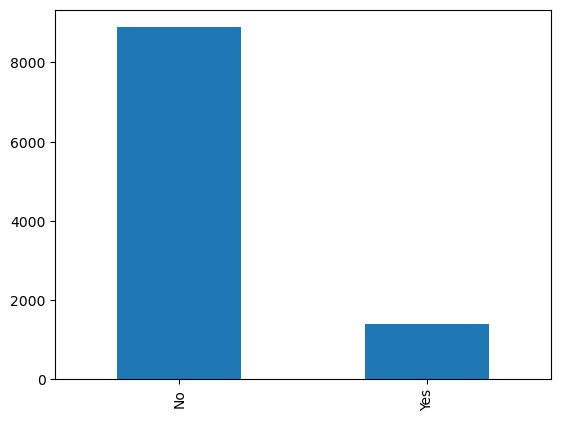

In [415]:
# 3. Show a plot of the total number of responses.

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

market_cust_data['response'].value_counts().plot(kind='bar')

In [416]:
# 4. Show a plot of the response rate by the sales channel.
market_cust_data['response_numeric']=market_cust_data['response'].apply(lambda x : 1 if x=='Yes' else 0)

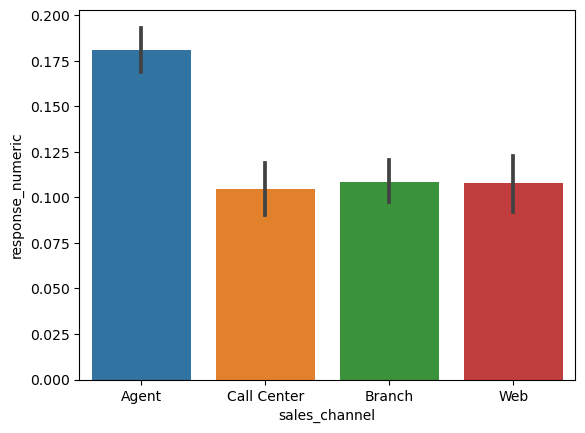

In [417]:
sns.barplot(x="sales_channel", y="response_numeric", data=market_cust_data)
plt.show()

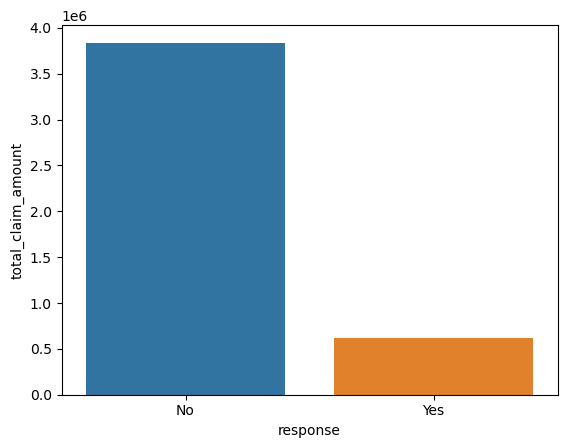

In [418]:
# 5. Show a plot of the response rate by the total claim amount.
sns.barplot(x = 'response',y='total_claim_amount', data=pd.DataFrame(market_cust_data.groupby(['response'])['total_claim_amount'].sum()).reset_index())
plt.show()


In [419]:
# 6. Show a plot of the response rate by income.
#sns.boxplot(x = 'response',y='income', data=pd.DataFrame(market_cust_data.groupby(['response'])['income'].sum()).reset_index())
#plt.show()

# Lab | Customer Analysis Round 4

In [420]:
# 1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals.
import numpy as np
numerical=market_cust_data.select_dtypes(include=np.number)
categoricals=market_cust_data.select_dtypes(include=object)

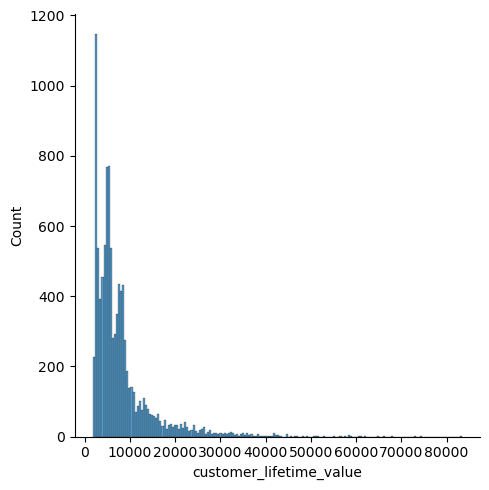

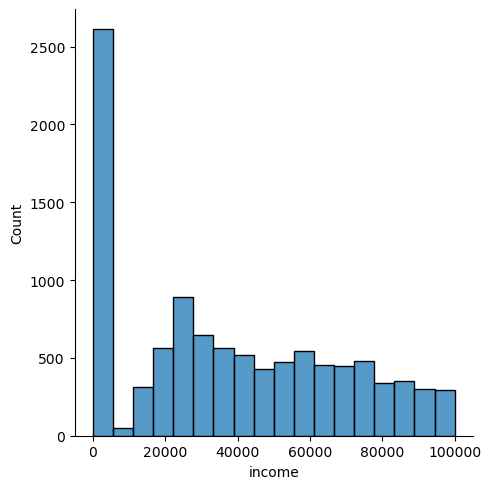

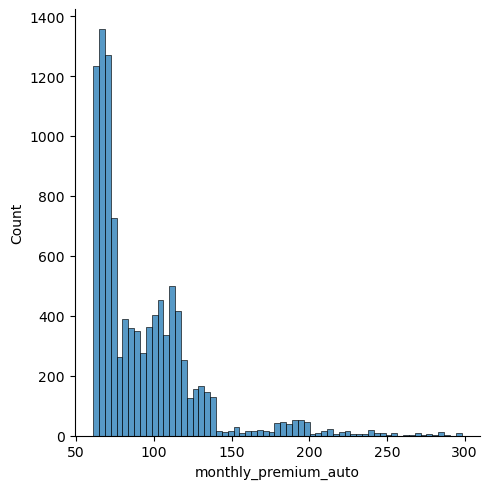

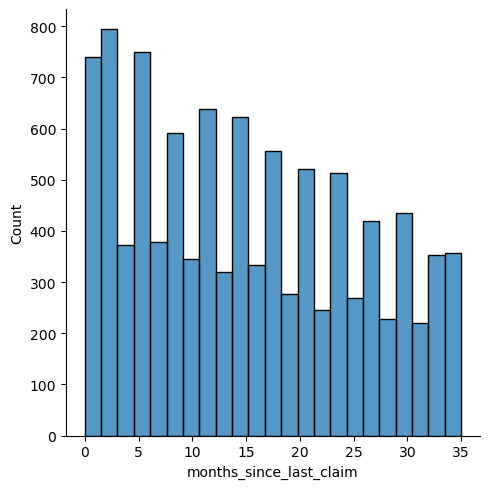

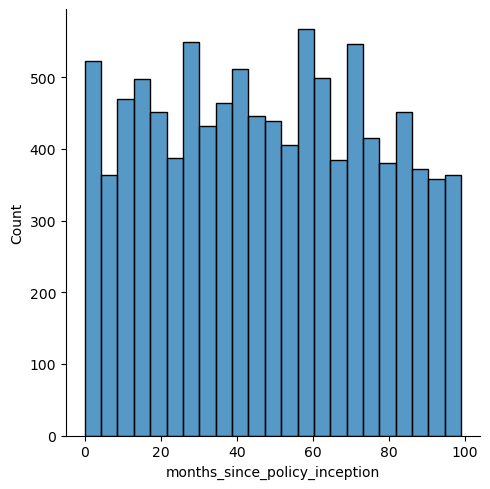

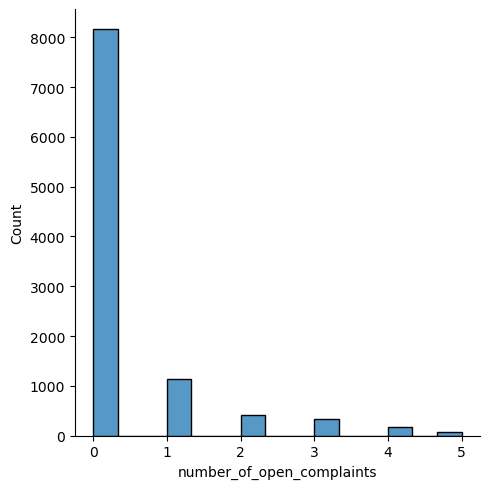

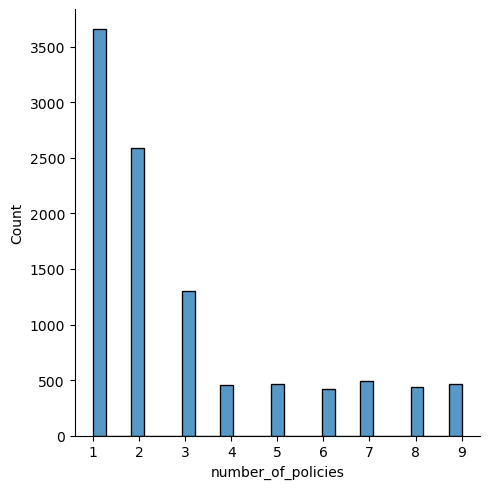

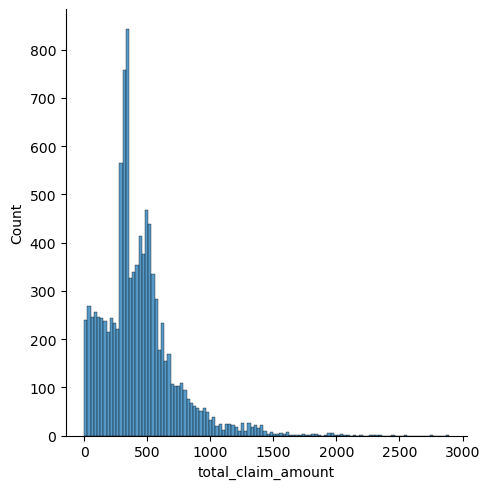

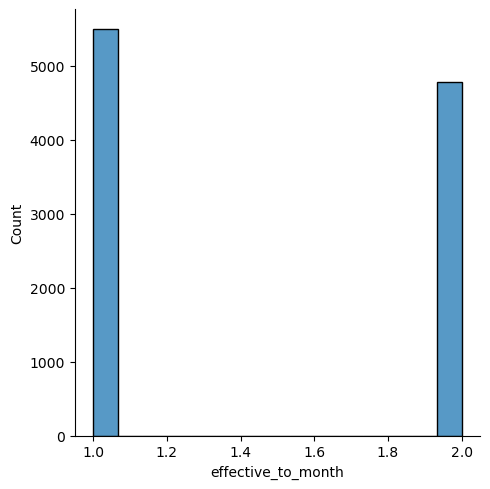

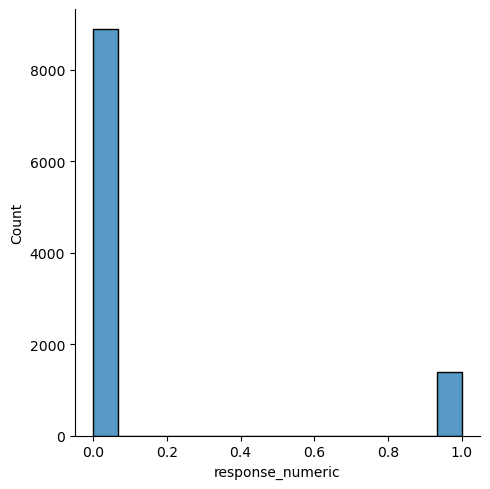

In [421]:
# 2.1. Use seaborn library to construct distribution plots for the numerical variables
for col in numerical.columns:
    sns.displot(numerical[col]) 
plt.show()

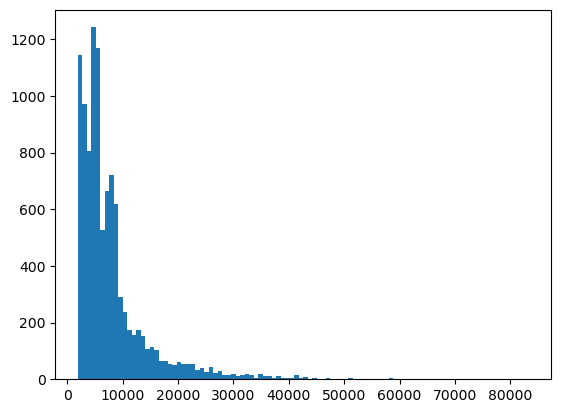

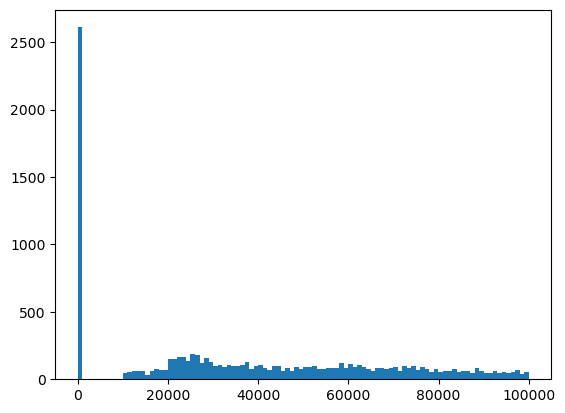

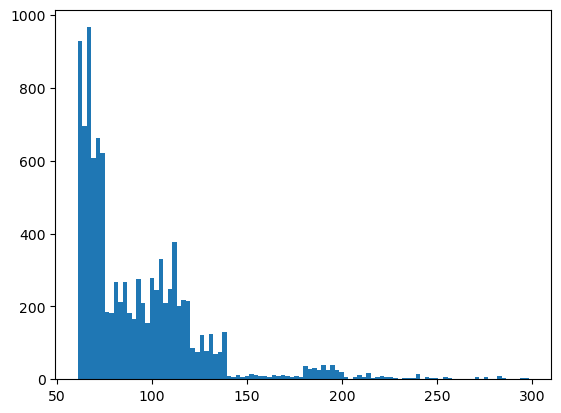

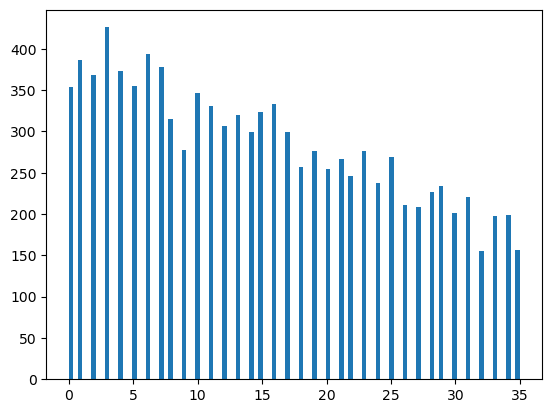

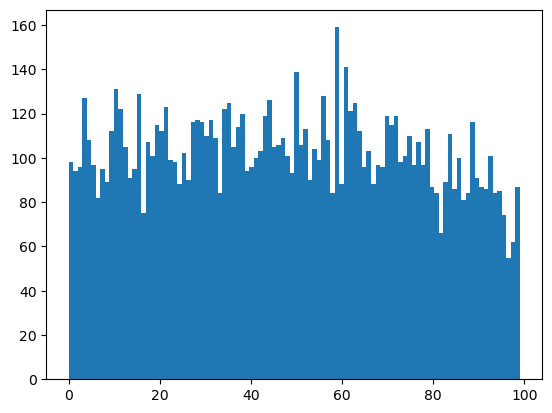

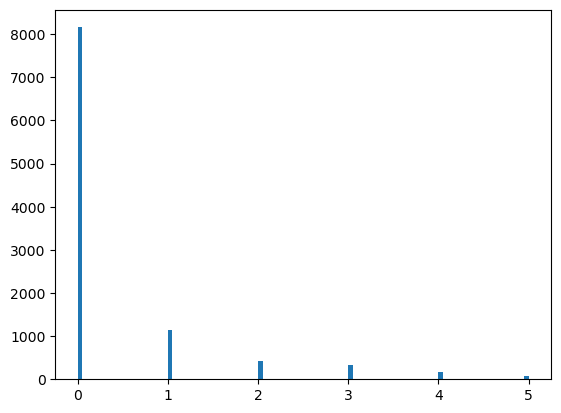

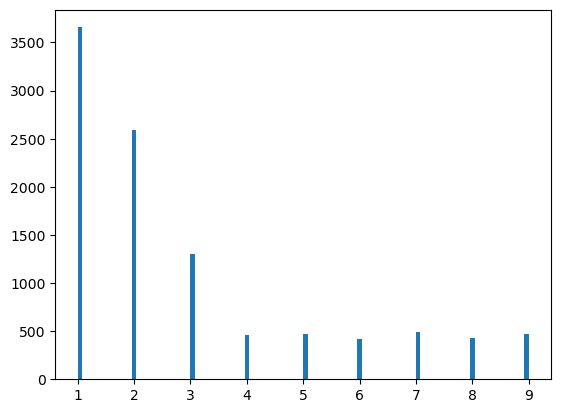

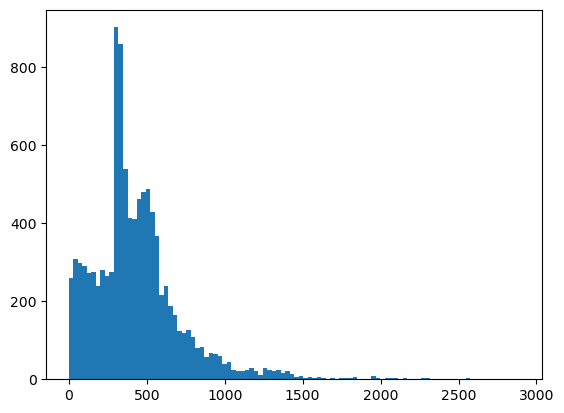

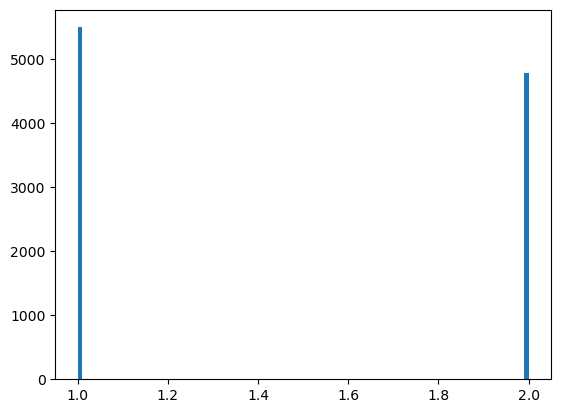

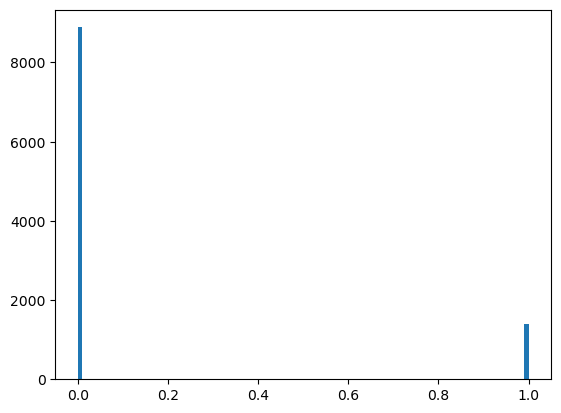

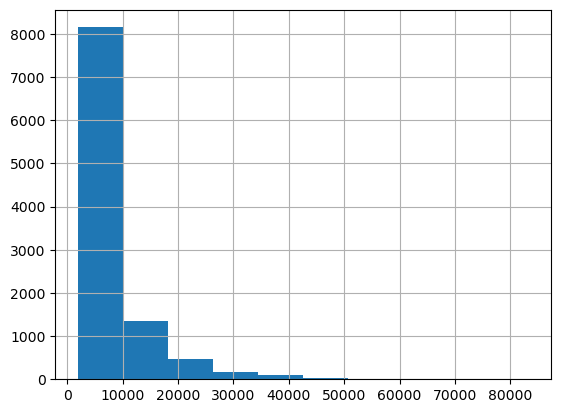

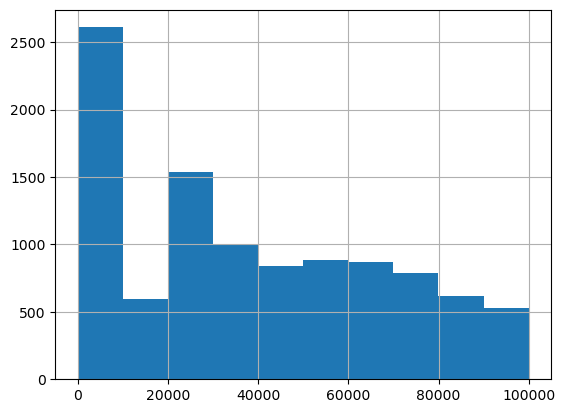

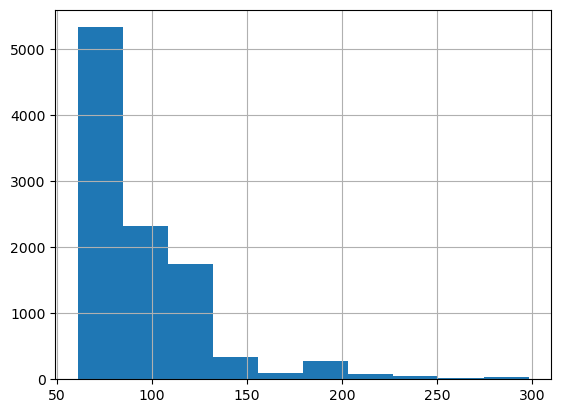

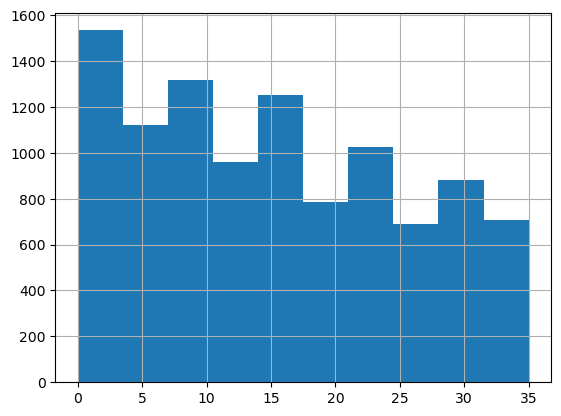

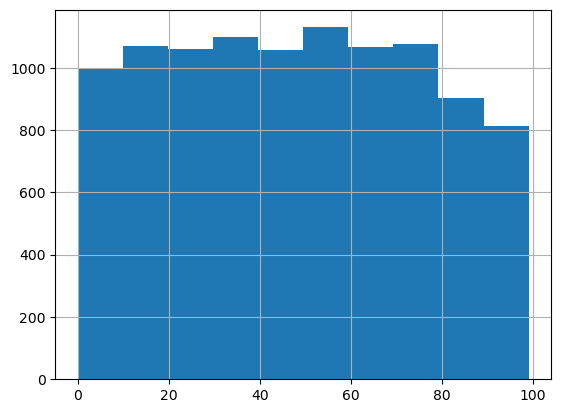

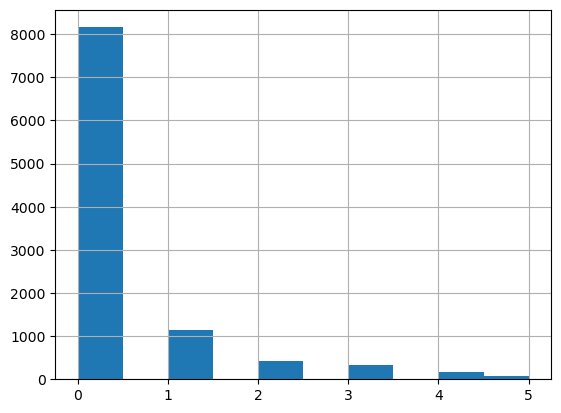

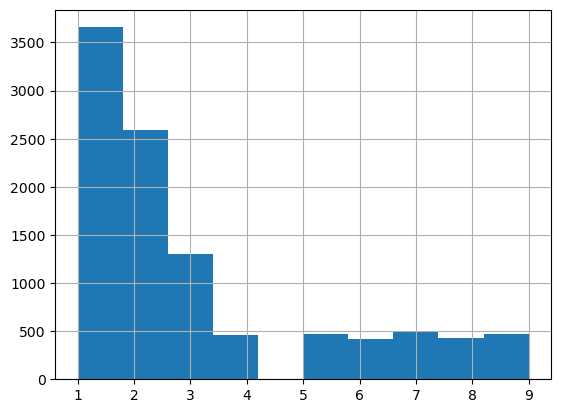

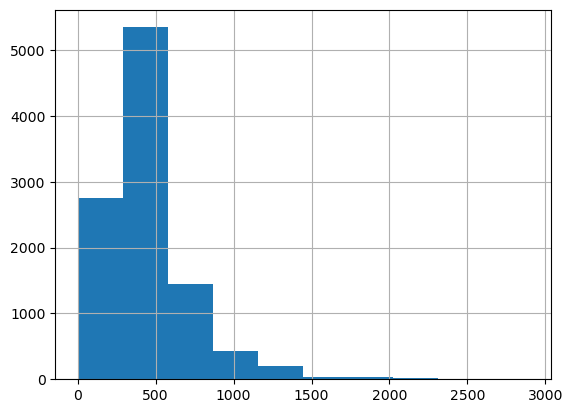

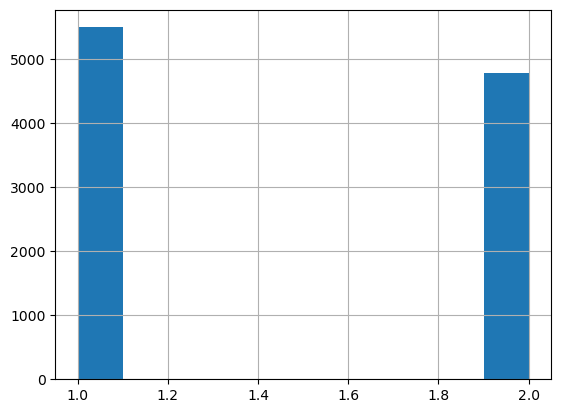

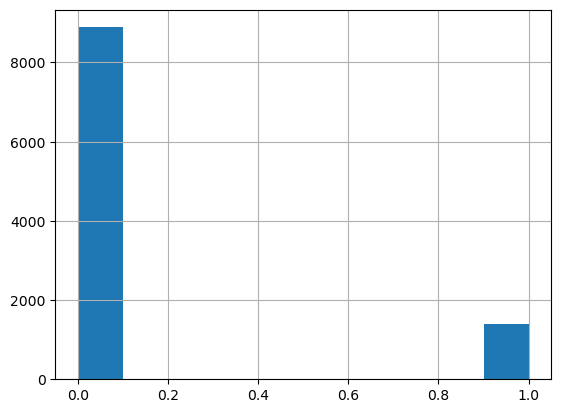

In [422]:
# 2.2. Use Matplotlib to construct histograms
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

num_bins=100

# Histogram Plotting Path 1 (through Matplotlib):
for col in numerical.columns:
    plt.hist(numerical[col], num_bins)
    plt.show()

# Histogram Plotting Path 2 (through pandas):
for col in numerical.columns:
    numerical[col].hist()
    plt.show()

In [423]:
# 2.3. Do the distributions for different numerical variables look like a normal distribution?

# No, they don't. They don't follow the normal convention of a normal distribution curve with 50% of the values 
# falling in between 25 to 75 percentile.

# income: The high frequency count of income 0 has got the curve left skewed, due to large number of entries of '0' income.
# monthly premium auto, customer_lifetime_value : left skewed
# months_since_policy_inception,months_since_last_claim : seems to be column with large no. of categories in numerical form, uniformly distributed.
# number_of_policies, effective_to_month : are clearly distinct categorical columns in numeric form.

In [424]:
# 3. Check the multicollinearity between the features.

# Before doing that, to make sure we get the accurate correlation, we try to make sure, we have excluded all the outliers.

# ***NOTE: I checked the outlier removal didn't improve any correlation, it instead made the correlation worse, so excluded
# outlier removal.

def ins_out_var_end_lst(df,out_col_name):
    new_col_lst = list(df.columns)
    new_col_lst.remove(out_col_name)
    new_col_lst.append(out_col_name)
    return df[new_col_lst]
    
def remove_outliers(df,col_name,sig_val):
    if sig_val%3==0:
        iqr = np.percentile(df[col_name],75) - np.percentile(df[col_name],25)
        upper_limit = np.percentile(df[col_name],75) + (sig_val/2)*iqr
        lower_limit = np.percentile(df[col_name],25) - (sig_val/2)*iqr
        return df[(df[col_name]>lower_limit) & (df[col_name]<upper_limit)]
    else:
        return None

In [425]:
#numerical=numerical[numerical['income']>0]

In [426]:
#sns.displot(numerical['customer_lifetime_value'])
#plt.show()

#numerical=remove_outliers(numerical,'customer_lifetime_value',3)

#sns.displot(numerical['customer_lifetime_value'])
#plt.show()

In [427]:
#sns.displot(numerical['monthly_premium_auto'])
#plt.show()

#numerical=remove_outliers(numerical,'monthly_premium_auto',3)

#sns.displot(numerical['monthly_premium_auto'])
#plt.show()

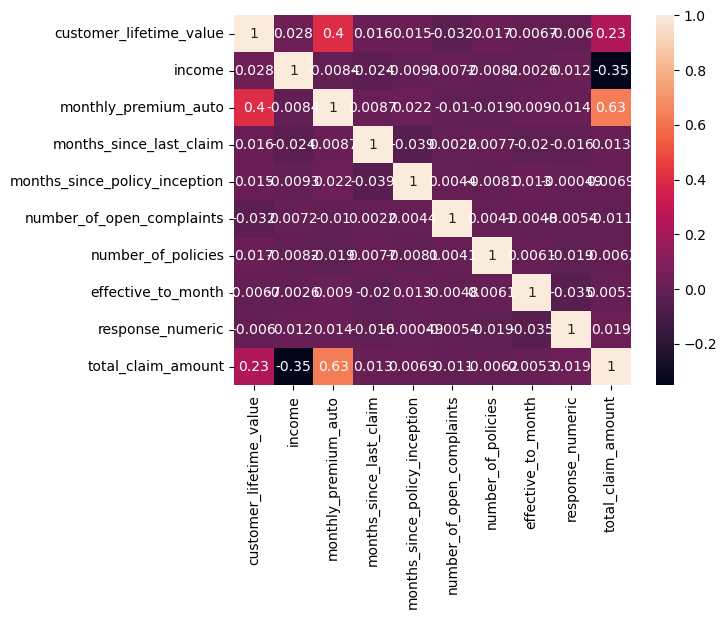

In [428]:
numerical=ins_out_var_end_lst(numerical,'total_claim_amount')
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# 'monthly_premium_auto' and 'customer_lifetime_value' have strong correlation to the output variable 'total_claim_amount'.
# We can consider both as inputs in building the linear regression model, as they have low correlation value among themselves
# i.e. 0.4

In [429]:
numerical=numerical.drop(['income','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies','effective_to_month'], axis=1)

# Lab | Customer Analysis Round 5

In [430]:
# 1. X-y split:
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
y = numerical['total_claim_amount']
X = numerical.drop(['total_claim_amount'], axis=1)

In [431]:
# 2. Normalizing data:
transformer = MinMaxScaler().fit(X)
X_normalized = transformer.transform(X)

In [432]:
# Fitting the Linear regression model
lm = linear_model.LinearRegression()
lm.fit(X,y)
print(lm.score(X,y))
y_pred = lm.predict(X)
print(mean_squared_error(y_pred,y))

0.40136690485564075
50925.54979797731


# lab-customer-analysis-round-6

In [433]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
market_cust_data=pd.read_csv("market_cust_data.csv")

In [434]:
# Split the numerical, categorical and the output column:
X_num=market_cust_data.select_dtypes(include=np.number)
X_cat=market_cust_data.select_dtypes(include=object)
y = X_num['total_claim_amount']
X_num = X_num.drop(['total_claim_amount'], axis=1)
X_cat=X_cat[[x for x in list(X_cat.columns) if x not in ['customer','effective_to_date']]]

In [435]:
# 2. Normalizing data:
transformer = MinMaxScaler().fit(X_num)
X_normalized = transformer.transform(X_num)
X_normalized = pd.DataFrame(X_normalized,columns=X_num.columns)

In [436]:
# Encoding categorical columns:
#encoder = OneHotEncoder(drop='first').fit(X_cat)
encoder = OneHotEncoder().fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_cat.columns)
onehot_encoded = pd.DataFrame(encoded, columns=cols)

In [437]:
# Concatenating normalized numeric columns and encoded categorical columns
X = pd.concat([X_normalized, onehot_encoded], axis=1) 

In [438]:
# Creating a Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=76)

In [439]:
# Creating and fitting a Linear Regression Model
lm = linear_model.LinearRegression()
lm.fit(X,y)

LinearRegression()

In [440]:
# Display of LM Metrics:
predictions_test = lm.predict(X_test)
print("r2_score: ",r2_score(y_test, predictions_test))
print("mean absolute error :",mean_absolute_error(y_test, predictions_test))
print("mean square error :",mean_squared_error(y_test,predictions_test))
print("root mean square error :",np.sqrt(mean_squared_error(y_test,predictions_test)))

r2_score:  0.7683099362993693
mean absolute error : 96.28720210797665
mean square error : 19424.59545509013
root mean square error : 139.37214734332727


# Lab | Customer Analysis Round 7

In [441]:
# Try to improve the linear regression model.

# Built a function to choose the best features having high correlation with the output variable and low correlation between them.

def select_features(X,y,selection_criteria=0,heatMap=False,dispSelCols=False):
    df=pd.concat([X,y],axis=1)
    correlations_matrix = df.corr()
    correlations_matrix=df[correlations_matrix[correlations_matrix[y.name]>selection_criteria][y.name].sort_values().index.tolist()].corr()
    validCols=[]
    for ind in correlations_matrix.index:
        if ind!=y.name:
            validFlag=True
            for col in correlations_matrix.columns:
                if col!=ind and col!=y.name:
                    if correlations_matrix[col][ind]>0.9 or correlations_matrix[col][ind]>=correlations_matrix[y.name][ind]:
                        validFlag=False
                        break
        else:
            continue
        validCols.append(ind)
    if heatMap==True:
        correlations_matrix=df[validCols+[y.name]].corr()
        sns.heatmap(correlations_matrix, annot=True)
        plt.show()
    if dispSelCols==True:
        print(validCols)
    return df[validCols]

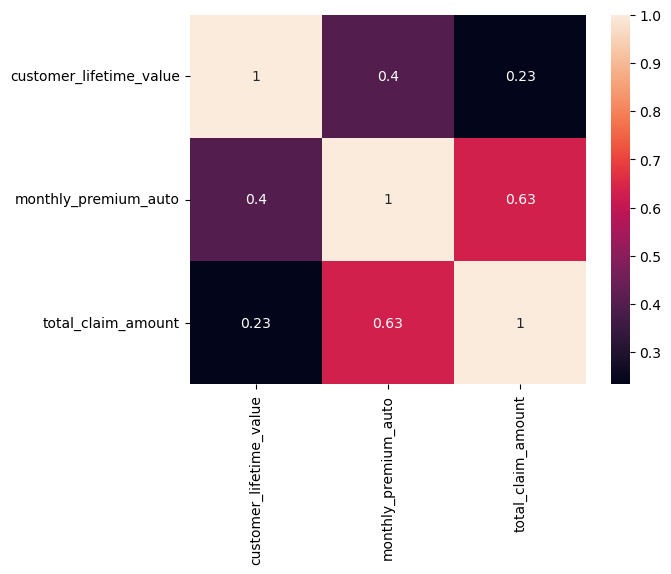

['customer_lifetime_value', 'monthly_premium_auto']


In [442]:
X_normalized=select_features(X_normalized,y,0.1,True,True)

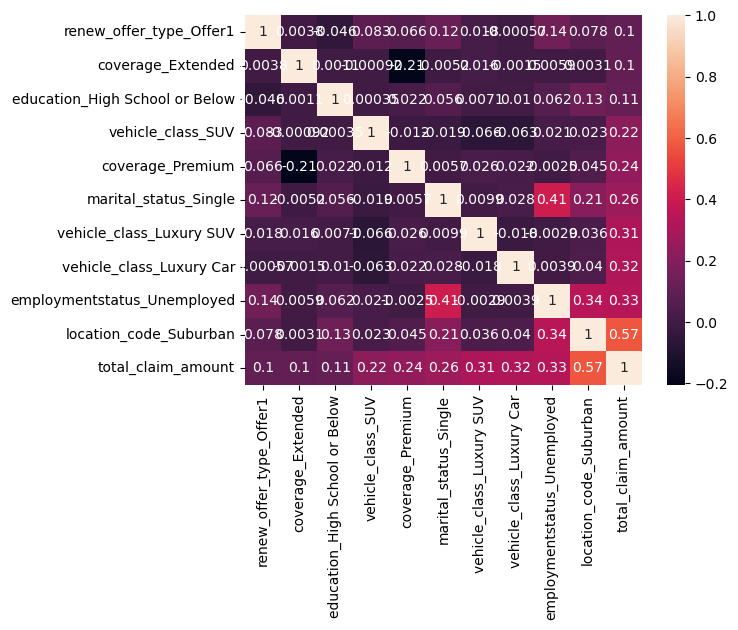

['renew_offer_type_Offer1', 'coverage_Extended', 'education_High School or Below', 'vehicle_class_SUV', 'coverage_Premium', 'marital_status_Single', 'vehicle_class_Luxury SUV', 'vehicle_class_Luxury Car', 'employmentstatus_Unemployed', 'location_code_Suburban']


In [443]:
onehot_encoded=select_features(onehot_encoded,y,0.1,True,True)

In [444]:
# Concatenating normalized numeric columns and encoded categorical columns
X = pd.concat([X_normalized, onehot_encoded], axis=1)

In [445]:
# Creating a Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=76)

In [446]:
# Creating and fitting a Linear Regression Model
lm = linear_model.LinearRegression()
lm.fit(X,y)

LinearRegression()

In [447]:
# Display of LM Metrics:
predictions_test = lm.predict(X_test)
print("r2_score: ",r2_score(y_test, predictions_test))
print("mean absolute error :",mean_absolute_error(y_test, predictions_test))
print("mean square error :",mean_squared_error(y_test,predictions_test))
print("root mean square error :",np.sqrt(mean_squared_error(y_test,predictions_test)))

r2_score:  0.7028648674562309
mean absolute error : 113.39674864084306
mean square error : 24112.948016520277
root mean square error : 155.28344411597868


In [ ]:
# Although best features were selected for the linear regression model, the model performance deteriorated.